In [1]:
import sqlite3
import pandas as pd

db_file='hw.db'
with sqlite3.connect(db_file) as hw:
    df=pd.read_sql('SELECT * FROM t', hw)
df


,index,date,city,item,qty,total
0,0,2018-01-01,0,1,38,55100
1,1,2018-01-01,0,2,52,37544
2,2,2018-01-01,1,2,2,1444
3,3,2018-01-01,0,3,17,39678
4,4,2018-01-01,0,4,15,28155
...,...,...,...,...,...,...
1715748,1715748,2019-12-31,1,1241,9,16110
1715749,1715749,2019-12-31,2,1241,6,10740
1715750,1715750,2019-12-31,0,1242,149,159430
1715751,1715751,2019-12-31,1,1242,18,19260


<AxesSubplot:xlabel='date'>

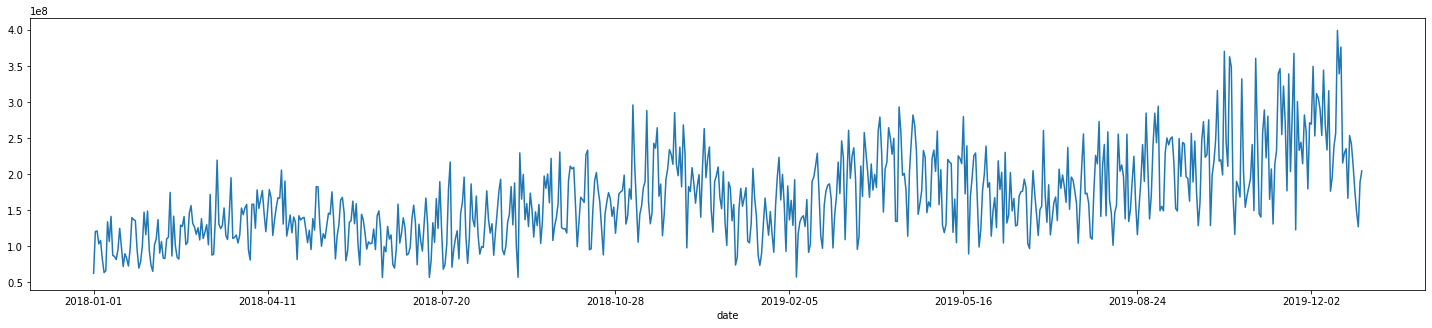

In [2]:
df.groupby('date')['total'].sum().plot(figsize=(25,5))

<Figure size 1440x360 with 0 Axes>

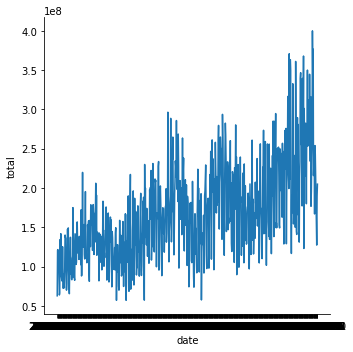

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sns.relplot(x='date', y='total', kind='line', data=df.groupby('date', as_index=False).sum())

<AxesSubplot:xlabel='date', ylabel='total'>

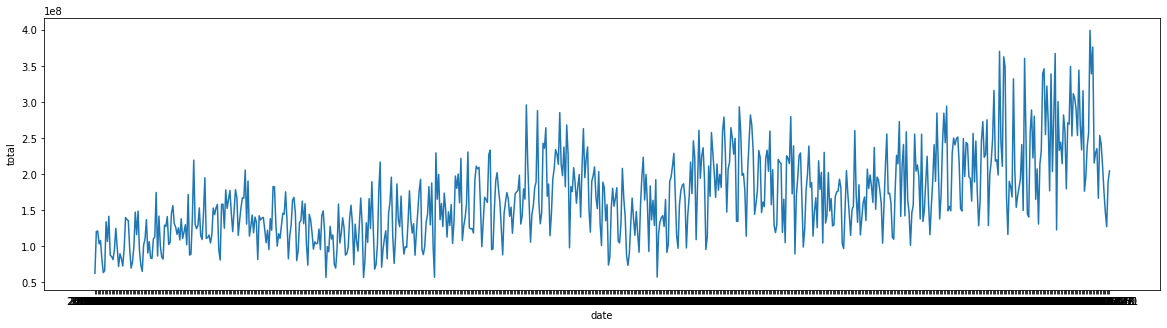

In [4]:
plt.figure(figsize=(20,5))
sns.lineplot(x='date', y='total', data=df.groupby('date', as_index=False).sum())

In [5]:
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='week', ylabel='total'>

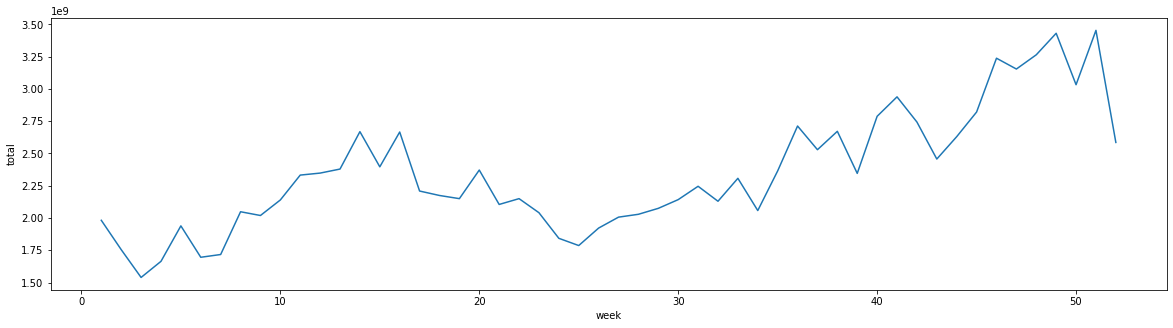

In [6]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['isoYear']=df['date'].dt.isocalendar().year
df['week']=df['date'].dt.isocalendar().week
df['startOfWeek']=df['date']-df['date'].dt.weekday*pd.Timedelta(days=1)
df['doy']=df['date'].dt.dayofyear
#dt=df.copy()
#dt.loc[dt.groupby('date')['total'].idxmax()].head(30)
plt.figure(figsize=(20,5))
sns.lineplot(x='week', y='total', data=df.groupby('week').sum())

<AxesSubplot:xlabel='doy', ylabel='total'>

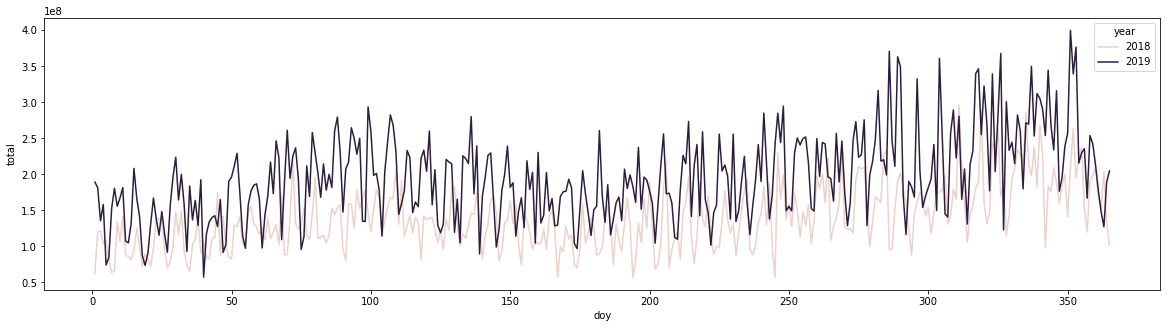

In [7]:

plt.figure(figsize=(20,5))
sns.lineplot(x='doy', y='total', hue='year', data=df.groupby(['year', 'doy']).sum())

<AxesSubplot:xlabel='startOfWeek', ylabel='total'>

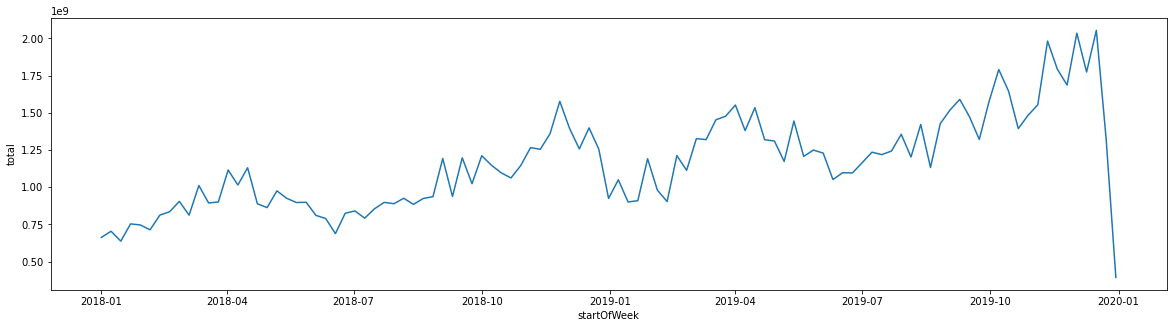

In [8]:
plt.figure(figsize=(20,5))
sns.lineplot(x='startOfWeek', y='total', data=df.groupby(['startOfWeek']).sum())

<AxesSubplot:xlabel='week', ylabel='total'>

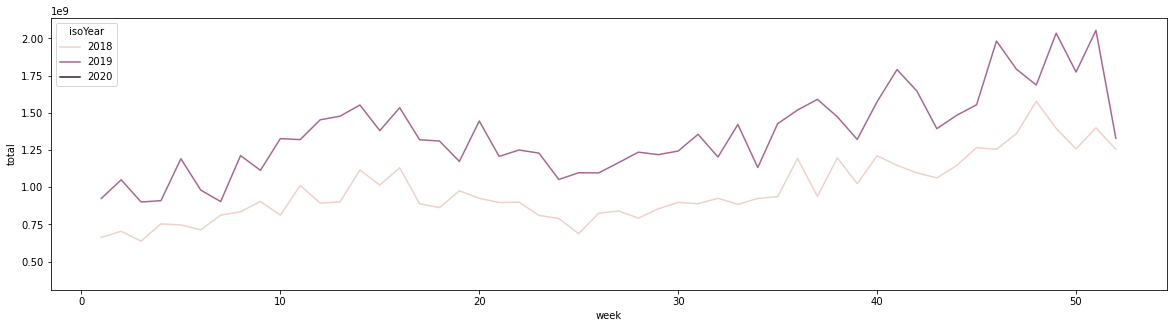

In [9]:
plt.figure(figsize=(20,5))
sns.lineplot(x='week', y='total', hue='isoYear', data=df.groupby(['isoYear', 'week']).sum())

In [10]:
df

,index,date,city,item,qty,total,year,isoYear,week,startOfWeek,doy
0,0,2018-01-01,0,1,38,55100,2018,2018,1,2018-01-01,1
1,1,2018-01-01,0,2,52,37544,2018,2018,1,2018-01-01,1
2,2,2018-01-01,1,2,2,1444,2018,2018,1,2018-01-01,1
3,3,2018-01-01,0,3,17,39678,2018,2018,1,2018-01-01,1
4,4,2018-01-01,0,4,15,28155,2018,2018,1,2018-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
1715748,1715748,2019-12-31,1,1241,9,16110,2019,2020,1,2019-12-30,365
1715749,1715749,2019-12-31,2,1241,6,10740,2019,2020,1,2019-12-30,365
1715750,1715750,2019-12-31,0,1242,149,159430,2019,2020,1,2019-12-30,365
1715751,1715751,2019-12-31,1,1242,18,19260,2019,2020,1,2019-12-30,365


In [11]:
#df.groupby('city')['total'].sum()
df.groupby('city').sum()
#It's possible any variant

,index,item,qty,total,year,isoYear,week,doy
city,,,,,,,,
0,735051357034,563160586,63615662,106020942477,1828829809,1828833531,23951997,165840570
1,464586380812,321321589,6088172,10112530277,1050054844,1050056997,14635712,101292742
2,247740756743,162957449,3013775,5036594148,534394791,534395882,7700335,53288492
3,24524826039,15210117,624263,1027740334,50029773,50029868,753726,5213902


In [12]:
dt=df.groupby('city').sum().assign(avg=lambda x:x.total/x.qty)[['avg']]
dt

,avg
city,
0,1666.585541
1,1661.012579
2,1671.191163
3,1646.325882


In [13]:
df.groupby('item').sum().sort_values(by='total', ascending=False)[['total']].head(5)

,total
item,
257,108625685
94,108144176
1070,107868650
1138,107527852
144,107267958


<AxesSubplot:>

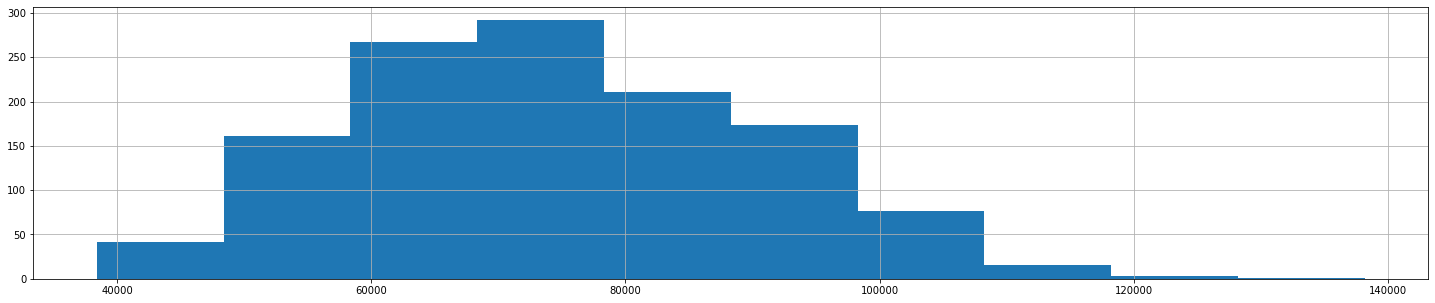

In [14]:
df.groupby('item')['total'].mean().hist(figsize=(25,5))

array([[<AxesSubplot:title={'center':'avg'}>]], dtype=object)

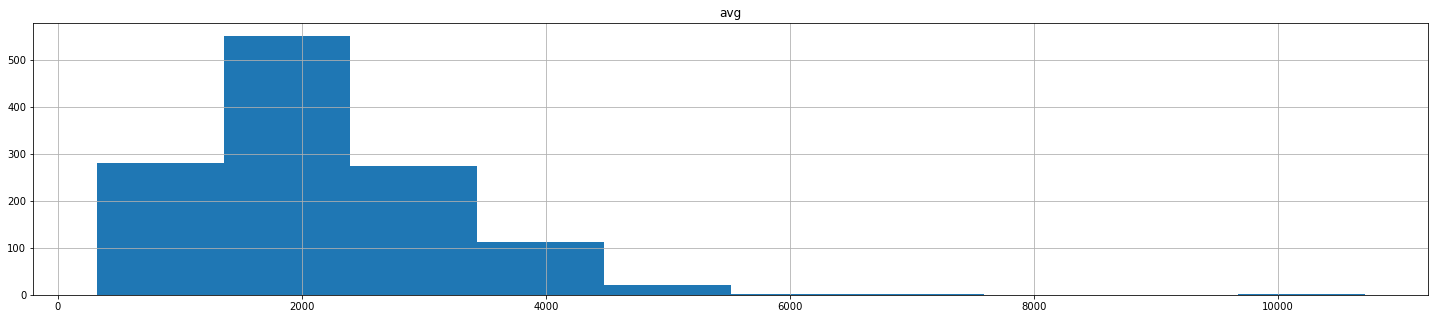

In [15]:
df.groupby('item').sum().assign(avg=lambda x:x.total/x.qty)[['avg']].hist(figsize=(25,5))

C:\Users\Vadim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg', ylabel='Density'>

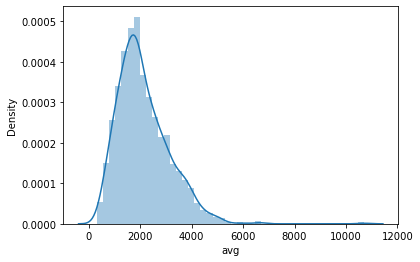

In [16]:
sns.distplot(df.groupby('item').sum().assign(avg = lambda x: x.total/x.qty)['avg'])

In [17]:
df[df['date'].dt.month==6].groupby('item')[['total']].sum().sort_values(by='total', ascending=False)[['total']].head(5)

,total
item,
1151,9925080
1148,9897705
302,9896215
848,9856536
65,9771020


In [18]:
df['month']=df['date'].dt.month
df

,index,date,city,item,qty,total,year,isoYear,week,startOfWeek,doy,month
0,0,2018-01-01,0,1,38,55100,2018,2018,1,2018-01-01,1,1
1,1,2018-01-01,0,2,52,37544,2018,2018,1,2018-01-01,1,1
2,2,2018-01-01,1,2,2,1444,2018,2018,1,2018-01-01,1,1
3,3,2018-01-01,0,3,17,39678,2018,2018,1,2018-01-01,1,1
4,4,2018-01-01,0,4,15,28155,2018,2018,1,2018-01-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1715748,1715748,2019-12-31,1,1241,9,16110,2019,2020,1,2019-12-30,365,12
1715749,1715749,2019-12-31,2,1241,6,10740,2019,2020,1,2019-12-30,365,12
1715750,1715750,2019-12-31,0,1242,149,159430,2019,2020,1,2019-12-30,365,12
1715751,1715751,2019-12-31,1,1242,18,19260,2019,2020,1,2019-12-30,365,12


In [19]:
df.groupby(['item','month'])[['total']].sum()
df[df['month']==6].groupby(['item','month'])[['total']].sum().sort_values(by='total', ascending=False)[['total']].head(5)

,,total
item,month,
1151,6,9925080
1148,6,9897705
302,6,9896215
848,6,9856536
65,6,9771020


In [25]:
df_t=df[df['date'].dt.year==2018].copy()


In [27]:
df_t.loc[:,'qrt']=0
df_t.loc[df_t['month']>=4,'qrt']=1
df_t.loc[df_t['month']>=7,'qrt']=2
df_t.loc[df_t['month']>=10,'qrt']=3
df_t=df_t[['item', 'qrt', 'total']].groupby(['item', 'qrt']).sum().unstack()

In [28]:
df_t

total                              
qrt         0         1         2         3
item                                       
1     6336500  12050950  10463200   8189600
2     9246654   9396830  10236516  14601006
3     8407068   9457368  10610364  14489472
4     6661473  12557130  10573141   8850055
5     9340791   9003740  10439153  15501989
...       ...       ...       ...       ...
1238  8387360   9591276  10762208  15007720
1239  8821722   9681360  10866492  13782028
1240  8584206   9692266   9356589  15072875
1241  7969080   7190430   8110490  14275250
1242  9382830   9364640  10695720  14709290

[1242 rows x 4 columns]

In [29]:
df_t.columns=[0,1,2,3]
df_t

,0,1,2,3
item,,,,
1,6336500,12050950,10463200,8189600
2,9246654,9396830,10236516,14601006
3,8407068,9457368,10610364,14489472
4,6661473,12557130,10573141,8850055
5,9340791,9003740,10439153,15501989
...,...,...,...,...
1238,8387360,9591276,10762208,15007720
1239,8821722,9681360,10866492,13782028
1240,8584206,9692266,9356589,15072875


In [30]:
df_t['s']=df_t[0]+df_t[1]+df_t[2]+df_t[3]
df_t[0]=df_t[0]/df_t['s']
df_t[1]=df_t[1]/df_t['s']
df_t[2]=df_t[2]/df_t['s']
df_t[3]=df_t[3]/df_t['s']
df_t

,0,1,2,3,s
item,,,,,
1,0.171071,0.325347,0.282482,0.221100,37040250
2,0.212660,0.216113,0.235425,0.335802,43481006
3,0.195676,0.220122,0.246958,0.337245,42964272
4,0.172390,0.324962,0.273619,0.229028,38641799
5,0.210921,0.203310,0.235723,0.350045,44285673
...,...,...,...,...,...
1238,0.191717,0.219236,0.246001,0.343045,43748564
1239,0.204436,0.224357,0.251821,0.319386,43151602
1240,0.201007,0.226954,0.219093,0.352946,42705936


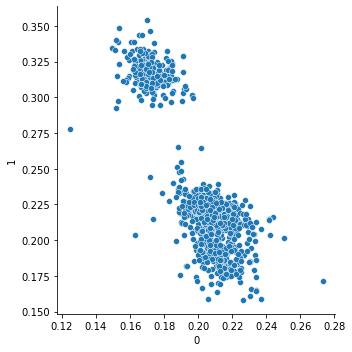

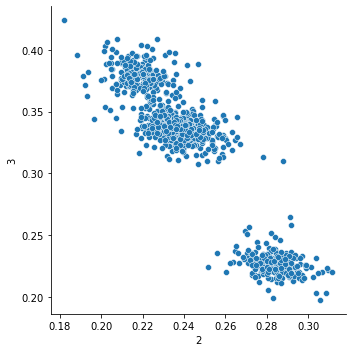

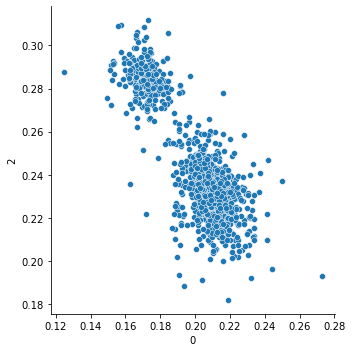

In [32]:
sns.relplot(data=df_t, x=0, y=1)
sns.relplot(data=df_t, x=2, y=3)
sns.relplot(data=df_t, x=0, y=2)

In [34]:
df_t.loc[:, 'tp']='I'
df_t.loc[df_t[3]>0.29,'tp']='II'
df_t.loc[df_t[3]>0.37,'tp']='III'
df_m=pd.DataFrame(df_t['tp'], index=df_t.index).reset_index()
df_m

,item,tp
0,1,I
1,2,II
2,3,II
3,4,I
4,5,II
...,...,...
1237,1238,II
1238,1239,II
1239,1240,II
1240,1241,III


In [35]:
df_tt=df.merge(df_m, on='item').groupby(['tp','startOfWeek'], as_index=False).sum()
df_tt

,tp,startOfWeek,index,city,item,qty,total,year,isoYear,week,doy,month
0,I,2018-01-01,15162104,671,1476013,53697,87812827,4643418,4643418,2301,9149,2301
1,I,2018-01-08,47407354,803,1543917,59831,99375063,4845218,4845218,4802,26427,2401
2,I,2018-01-15,75351197,640,1487028,52647,87790099,4645436,4645436,6906,41266,2302
3,I,2018-01-22,111066043,810,1545164,64211,106442292,4869434,4869434,9652,60082,2413
4,I,2018-01-29,150204025,933,1615788,70561,116739687,5085360,5085360,12600,80245,3891
...,...,...,...,...,...,...,...,...,...,...,...,...
310,III,2019-12-02,7151905359,4179,2757706,302541,491593920,8792745,8792745,213395,1476235,52260
311,III,2019-12-09,7028159907,3999,2677749,288599,466834362,8534313,8534313,211350,1462080,50724
312,III,2019-12-16,7574810365,4507,2840505,355410,577244407,9087519,9087519,229551,1588517,54012
313,III,2019-12-23,6533572482,3272,2428580,222027,361093259,7750941,7750941,199628,1381561,46068


<AxesSubplot:xlabel='startOfWeek', ylabel='total'>

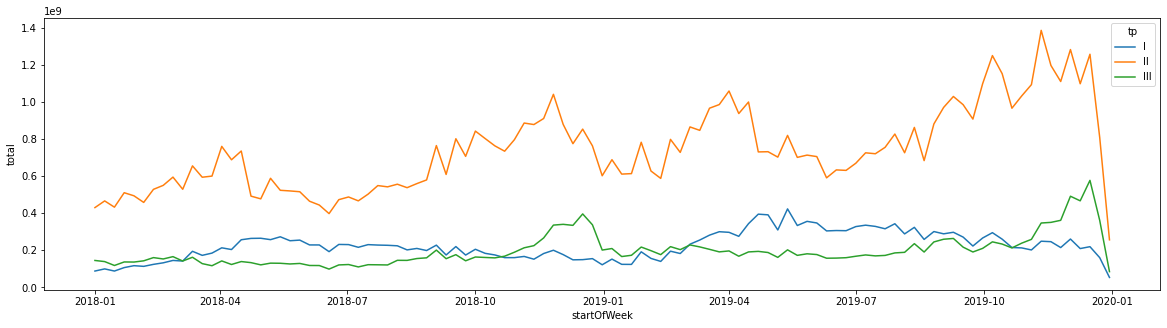

In [38]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_tt, x='startOfWeek', y='total', hue='tp')

In [40]:
plt.figure(figsize=(20,5))
df_tt=df.merge(df_m, on='item').groupby(['tp','city']).sum()[['total']].unstack()
df_tt.columns=[0,1,2,3]
ss=df_tt.sum(axis=1)
ss

tp
I      23609766937
II     77935864112
III    20652176187
dtype: int64

<Figure size 1440x360 with 0 Axes>

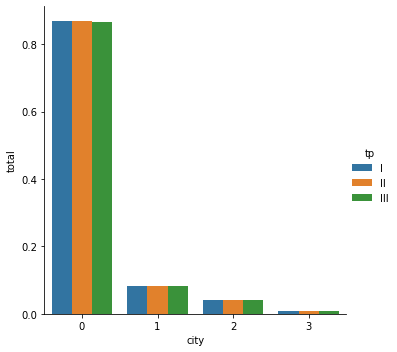

In [41]:
for c in df_tt.columns:
    df_tt[c]=df_tt[c]/ss
df_tt=df_tt.stack().reset_index()
df_tt.columns=['tp', 'city', 'total']
sns.catplot(data=df_tt, x='city', y='total', hue='tp', kind='bar')